<a href="https://colab.research.google.com/github/Jesolis14/Excercise/blob/main/Conjunto_de_datos_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nacimientos Sonora Noviembre 2023
#### En el siguiente documento lo que haremos es (medio) estudiar los nacimientos de Sonora en noviembre del 2023, para ello cargamos una base de datos desde una url.


### En la siguiente celda importamos las librerias que necesitaremos en la libreta de Jupyter

In [96]:
import pandas as pd
import requests
from zipfile import ZipFile
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

A continuacion leimos el archivo csv directo desde una url, para ser honesto se lo que hace el codigo, pero yo no lo escribí, me ayudaron un poco. Se muestra el dataframe que leimos, en este caso se muestran todos los nacimientos que huieron en el año 2023 en todo México.

In [20]:
# URL del archivo ZIP
url_zip = "http://www.dgis.salud.gob.mx/descargas/datosabiertos/nacimientos/sinac_2023.zip?V=2024.05.14"

# Descargar el archivo ZIP
r = requests.get(url_zip)

# Leer el contenido del archivo ZIP
with ZipFile(BytesIO(r.content)) as zip_file:
    # Filtrar archivos CSV
    csv_files = [f for f in zip_file.namelist() if f.endswith('.csv')]

    if len(csv_files) == 0:
        print("No se encontraron archivos CSV en el archivo ZIP.")
    else:
        # Suponiendo que solo hay un archivo CSV en el archivo ZIP
        csv_filename = csv_files[0]

        # Leer el archivo CSV en un DataFrame
        with zip_file.open(csv_filename) as csvfile:
            df = pd.read_csv(csvfile)

# Mostrar el DataFrame
df


,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA,FECHACERTIFICADO
0,2,9,12,25,2,2,23/07/1997,5,2,9,...,11.0,9,10,1,1,NaN,9,10,1,09/05/2023
1,2,15,33,22,2,2,11/05/2000,5,2,9,...,11.0,9,5,1,1,NaN,9,5,1,28/02/2023
2,2,12,28,20,1,1,12/08/2002,4,2,12,...,14.0,12,28,1,2,NaN,12,28,1,17/06/2023
3,2,13,63,28,2,2,24/12/1994,4,2,13,...,11.0,13,63,1,1,NaN,13,63,1,21/11/2023
4,2,15,101,29,2,2,23/05/1993,4,2,15,...,11.0,15,54,35,1,NaN,15,54,35,08/05/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521275,2,9,15,23,2,2,18/12/1999,4,2,9,...,11.0,9,15,1,2,DFSSA003973,9,15,1,20/11/2023
1521276,2,15,40,16,2,2,11/02/2007,4,2,15,...,11.0,15,40,13,2,MCSSA010251,15,40,13,15/08/2023
1521277,2,8,19,21,2,2,06/07/2002,1,2,8,...,11.0,8,19,1,2,CHSMP000066,8,19,1,27/11/2023
1521278,2,14,114,36,2,2,11/08/1987,5,2,25,...,11.0,25,1,1,7,SLSSA000024,25,1,1,21/11/2023


Lo que se hace aquí es creer un diccionario para despues ayudarnos a asignarle un municipio a todas los datos que vamos a obtener del estadomde sonora.

In [90]:
municipios_de_sonora = [
    'Aconchi',
    'Agua Prieta',
    'Alamos',
    'Altar',
    'Arivechi',
    'Arizpe',
    'Atil',
    'Bacadéhuachi',
    'Bacanora',
    'Bacerac',
    'Bacoachi',
    'Bácum',
    'Banámichi',
    'Baviácora',
    'Bavispe',
    'Benjamín Hill',
    'Caborca',
    'Cajeme',
    'Cananea',
    'Carbó',
    'La Colorada',
    'Cucurpe',
    'Cumpas',
    'Divisaderos',
    'Empalme',
    'Etchojoa',
    'Fronteras',
    'Granados',
    'Guaymas',
    'Hermosillo',
    'Huachinera',
    'Huásabas',
    'Huatabampo',
    'Huépac',
    'Imuris',
    'Magdalena',
    'Mazatán',
    'Moctezuma',
    'Naco',
    'Nácori Chico',
    'Nacozari de García',
    'Navojoa',
    'Nogales',
    'Onavas',
    'Opodepe',
    'Oquitoa',
    'Pitiquito',
    'Puerto Peñasco',
    'Quiriego',
    'Rayón',
    'Rosario',
    'Sahuaripa',
    'San Felipe de Jesús',
    'San Javier',
    'San Luis Río Colorado',
    'San Miguel de Horcasitas',
    'San Pedro de la Cueva',
    'Santa Ana',
    'Santa Cruz',
    'Sáric',
    'Soyopa',
    'Suaqui Grande',
    'Tepache',
    'Trincheras',
    'Tubutama',
    'Ures',
    'Villa Hidalgo',
    'Villa Pesqueira',
    'Yécora'
]
diccionario = {i+1: municipios_de_sonora[i] for i in range(len(municipios_de_sonora))}
diccionario[70,71,72,998,999] = 'Extranjero'


Aqui lo que se hace es cambier el tipo de dato en las columnas que son fechas, el archivo estaba en tipo str y lo que hacemos es cambiarlas a tipo timestamp.

In [24]:
df['FECHANACIMIENTOMADRE'] = pd.to_datetime(df['FECHANACIMIENTOMADRE'], format='%d/%m/%Y', errors='coerce')
df['FECHACERTIFICADO'] = pd.to_datetime(df['FECHACERTIFICADO'], format='%d/%m/%Y', errors='coerce')
df['FECHANACIMIENTO'] = pd.to_datetime(df['FECHANACIMIENTO'], format='%d/%m/%Y', errors='coerce')

Ahora seleccionamos los datos que me interesan, según el diccionario tenemos que la entidad numero 26es el estado de Sonora. por ellos soleccionamos loamente el 26 y el mes 11, que es noviembre (eso lo escogi porque nací en noviembre), y tambien remplazamos el 26 por la palabra Sonora y cambiamos todos los municipios por el nombre del municipio.

In [65]:
datos_sonora = df[(df['FECHANACIMIENTO'].dt.month == 11) & (df['ENTIDADNACIMIENTO'] == 26)]
datos_sonora['ENTIDADNACIMIENTO'] = datos_sonora['ENTIDADNACIMIENTO'].replace({26:'Sonora'})
datos_sonora['MUNICIPIONACIMIENTO'] = datos_sonora['MUNICIPIONACIMIENTO'].replace(diccionario)
datos_sonora

<ipython-input-65-1db1015abb1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_sonora['ENTIDADNACIMIENTO'] = datos_sonora['ENTIDADNACIMIENTO'].replace({26:'Sonora'})
<ipython-input-65-1db1015abb1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_sonora['MUNICIPIONACIMIENTO'] = datos_sonora['MUNICIPIONACIMIENTO'].replace(diccionario)


,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA,FECHACERTIFICADO
1086,2,Sonora,Caborca,20,2,2,2003-02-11,4,2,26,...,11.0,26,17,1,1,NaN,26,17,1,2024-03-10
1172,2,Sonora,Bacerac,31,2,2,1992-05-28,5,2,26,...,11.0,26,18,1,7,NaN,26,18,1,2023-11-05
2523,2,Sonora,Caborca,40,2,2,1982-12-13,4,2,26,...,11.0,26,17,1,7,NaN,26,17,1,2023-11-13
2541,2,Sonora,Hermosillo,25,2,2,1998-11-12,1,2,26,...,11.0,26,17,1,7,NaN,26,17,1,2023-11-29
3995,2,Sonora,Etchojoa,22,2,2,2001-05-12,4,2,26,...,12.0,26,33,1,2,NaN,26,33,1,2023-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520780,2,Sonora,Cajeme,27,2,2,1996-03-08,4,2,26,...,11.0,26,18,1,2,SRIMS000145,26,18,1,2023-11-10
1520841,2,Sonora,Cananea,33,2,2,1990-08-18,5,2,26,...,11.0,26,30,1,2,SRSMP000372,26,30,1,2023-11-08
1520920,2,Sonora,Cajeme,20,2,2,2002-12-04,5,2,26,...,11.0,26,18,1,1,SRIMS000145,26,18,1,2023-11-24
1520926,2,Sonora,Cajeme,35,2,2,1988-09-03,5,2,26,...,11.0,26,18,1,2,SRSME000023,26,18,1,2023-11-15


Estube tratando de buscar cuantos nacimientos pasaron por municipio, me di cuenta que todos los nacimientos en Sonora en noviembre del 2023 sobrevivieron, porlo que la columna SOBREVIVIEROPARTO la use como referente para sumar el numero de partos que hubo por municipio.

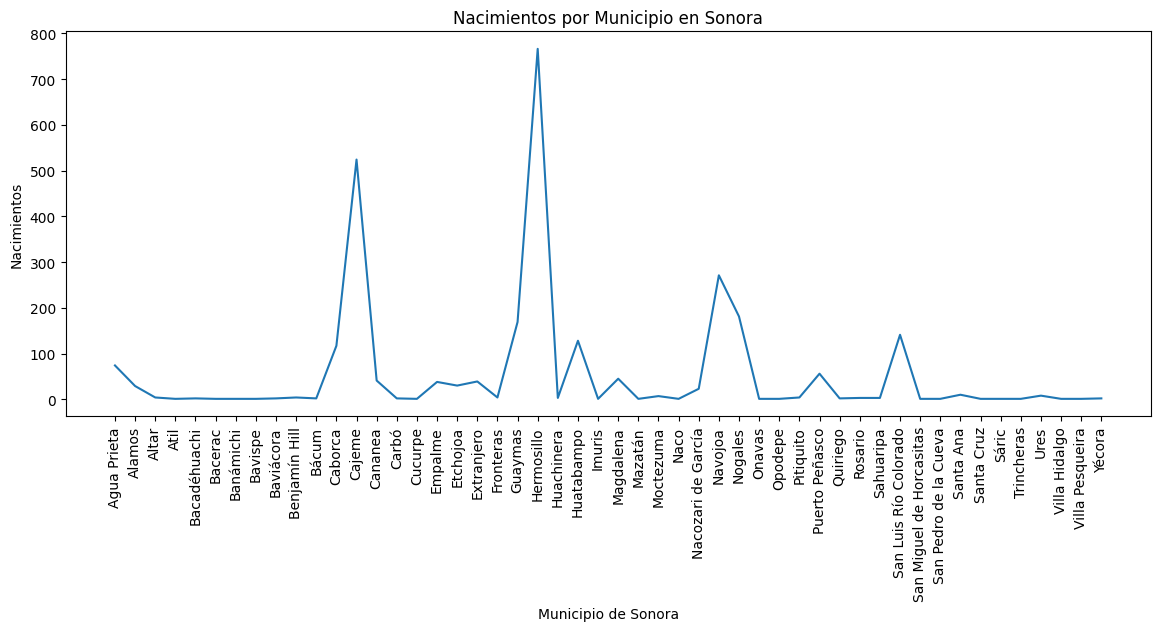

In [81]:
plt.figure(figsize=(14, 5))
plt.title('Nacimientos por Municipio en Sonora')
plt.plot(datos_sonora.groupby('MUNICIPIONACIMIENTO')[['SOBREVIVIOPARTO']].sum())
plt.xticks(rotation=90)
plt.xlabel('Municipio de Sonora')
plt.ylabel('Nacimientos')
plt.show()

Otro dato importante que se mi hizo es buscar el numero de pertos en mujeres menores de edad hay en el estado. Esto se puede usar para informar al gobierno sobre los problemas sociales que pasan durante la adolecencia en Sonora.

In [93]:
datos_sonora[datos_sonora['EDAD'] < 18].groupby('EDAD')[['SOBREVIVIOPARTO']].sum()

,SOBREVIVIOPARTO
EDAD,
14,4
15,25
16,48
17,86


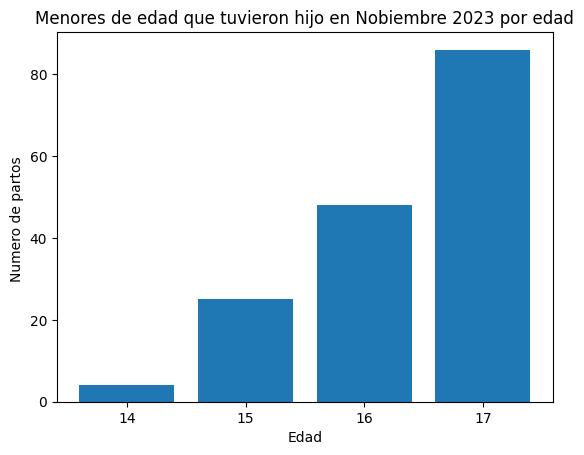

In [103]:
datos_filtrados = datos_sonora[datos_sonora['EDAD'] < 18].groupby('EDAD')['SOBREVIVIOPARTO'].sum()

# Crear la gráfica de barras
plt.bar(datos_filtrados.index, datos_filtrados.values)

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Numero de partos ')
plt.title('Menores de edad que tuvieron hijo en Noviembre 2023 por edad')
plt.xticks(range(int(min(datos_filtrados.index)), int(max(datos_filtrados.index)) + 1))
# Mostrar la gráfica
plt.show()

Es importante ver los datos sobre las nacimientos en el estado de Sonora, con ellas podemos buscaro soluciones para ayudar a mujeres de distintas edades en el area de maternidad, otro cosa que podria ser interesante es comparalo con el numero de defunciones para ver como va creciendo o decreciendo la población en el estado. Por mi parte es todo, lamento no poder hacer más, pero esprero poder mejorar mis habilidades de programar.


